In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [ ]:
df=pd.read_csv('/content/heart dis.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


<Axes: >

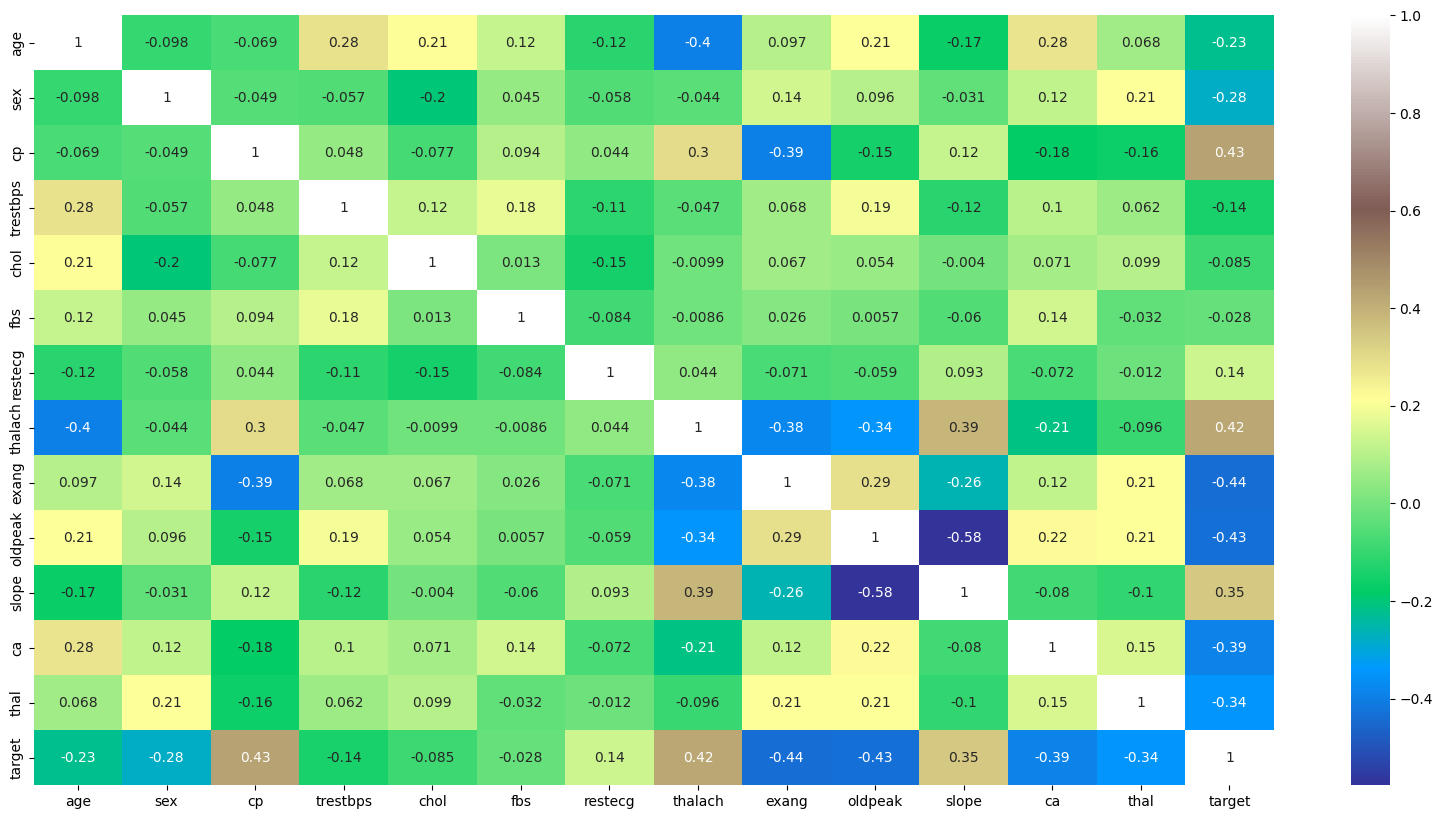

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='terrain')

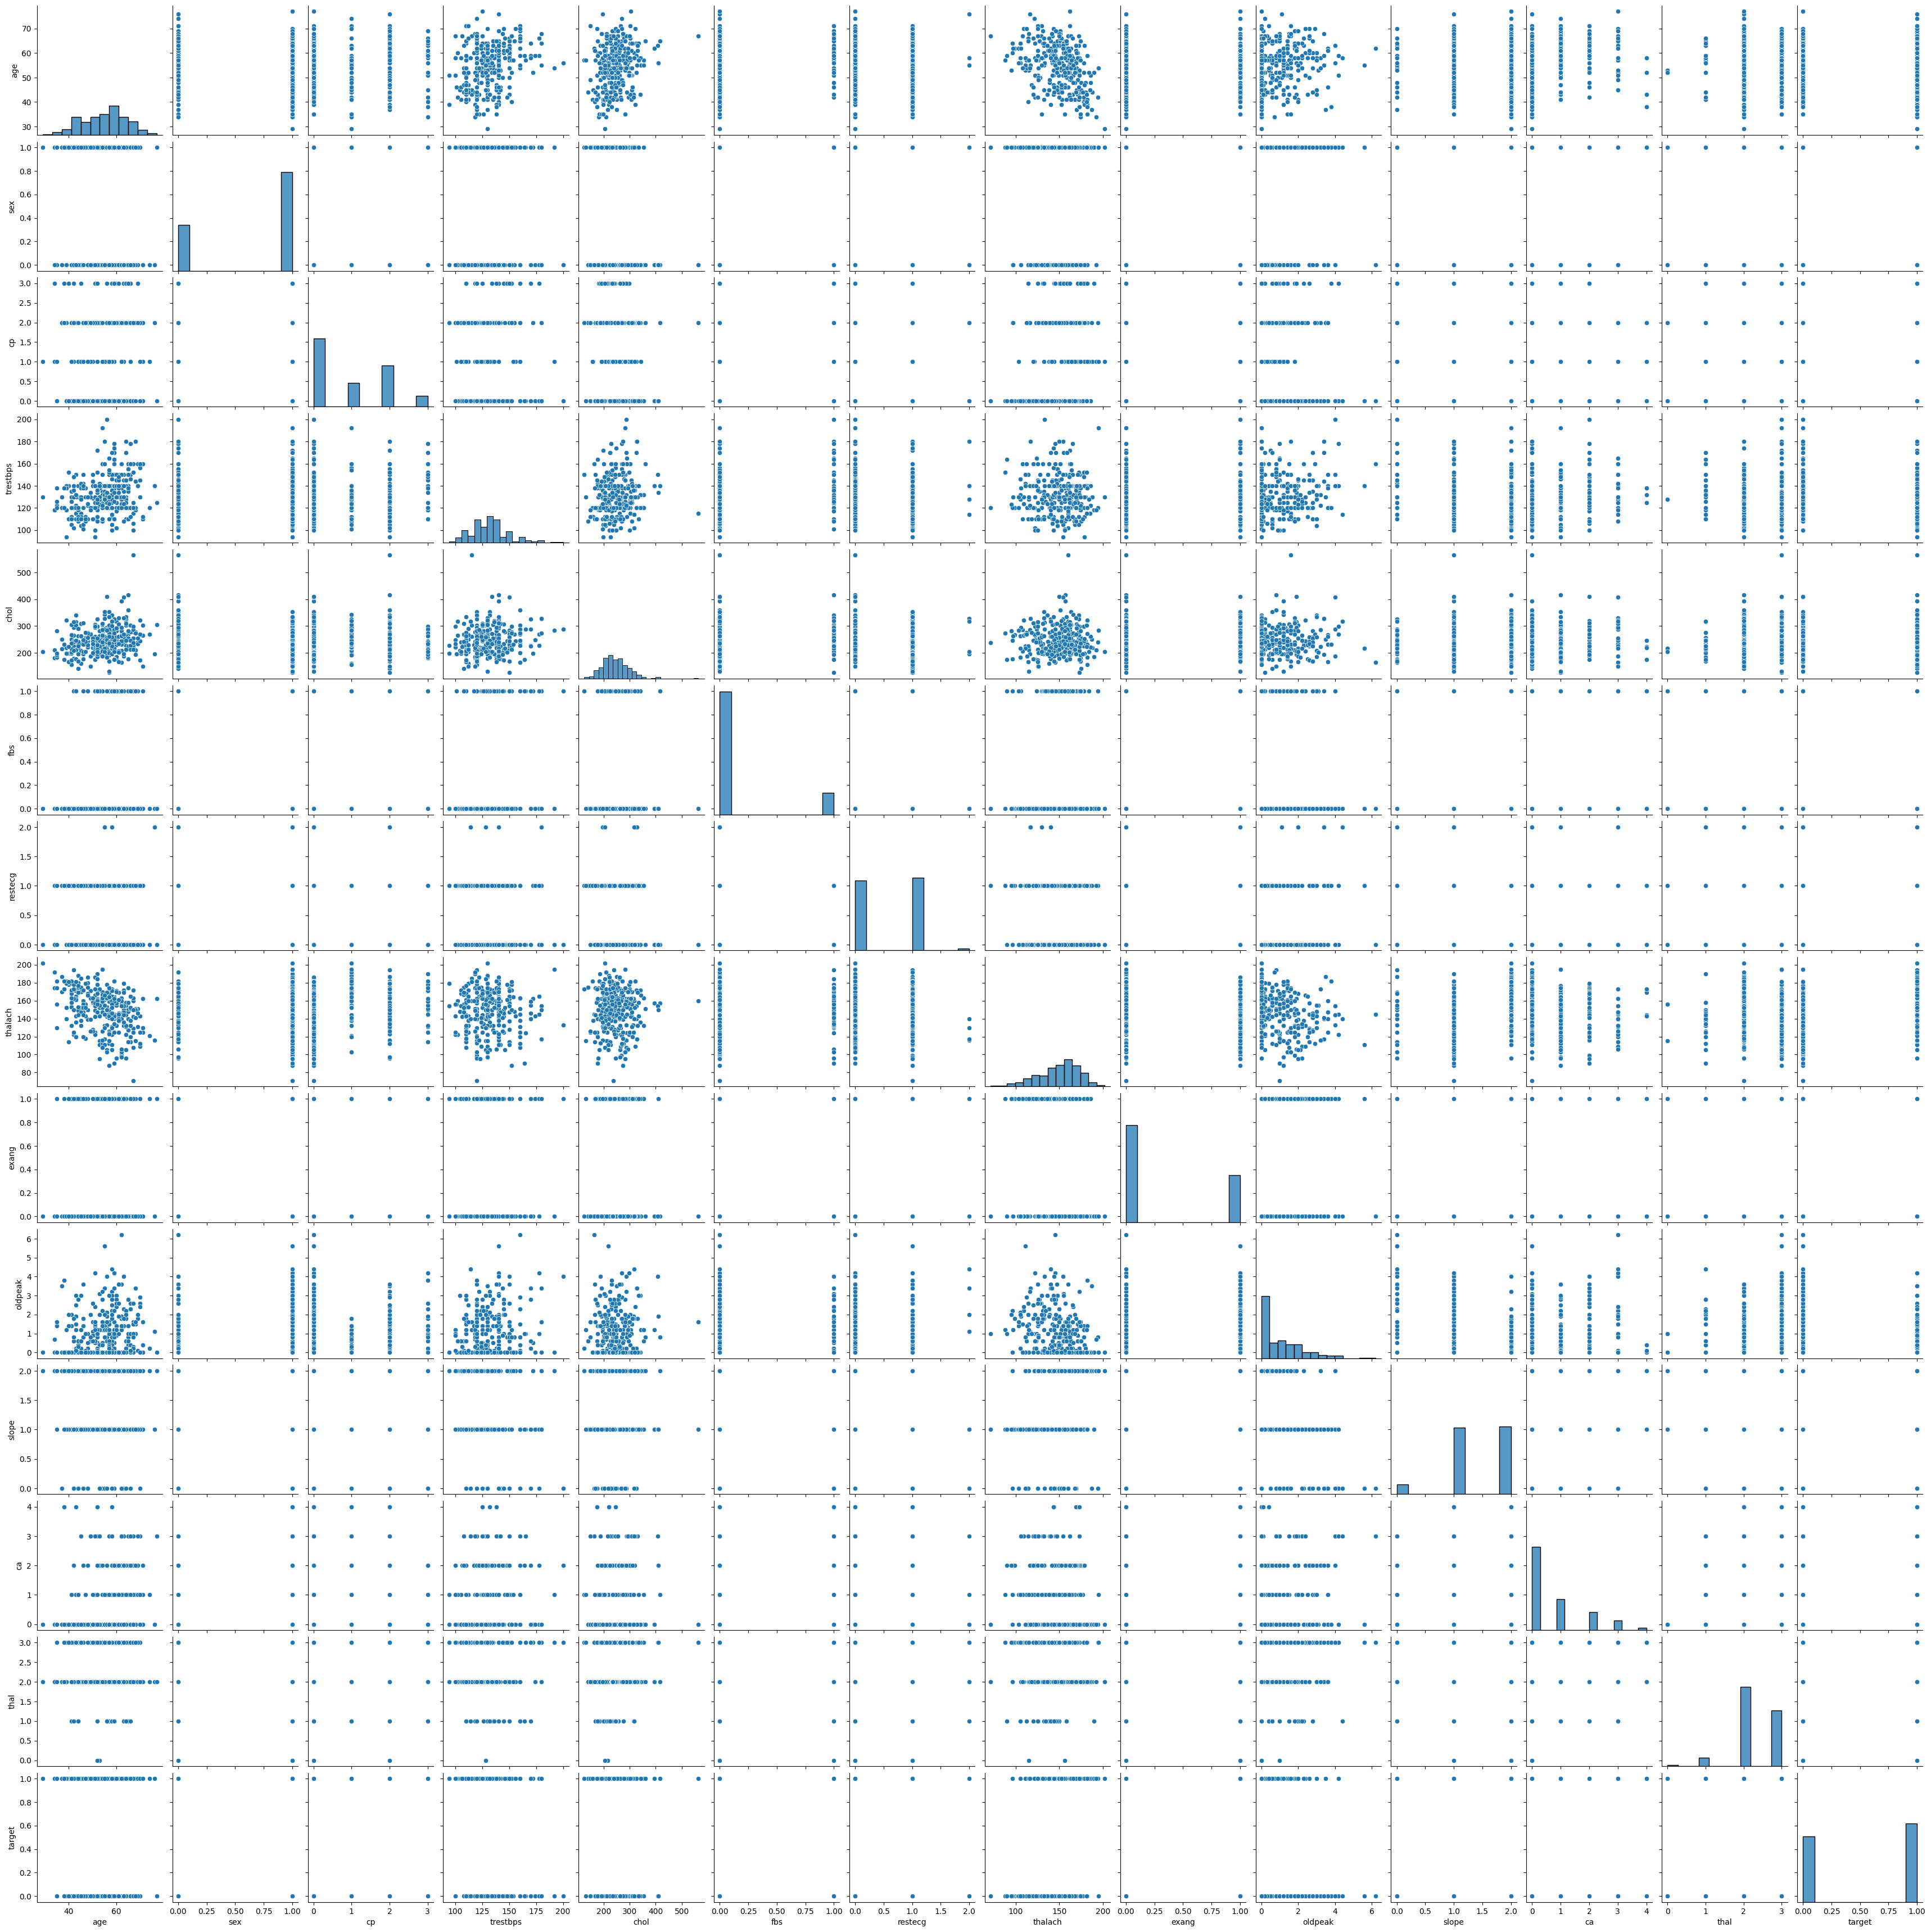

In [ ]:
sns.pairplot(data=df)


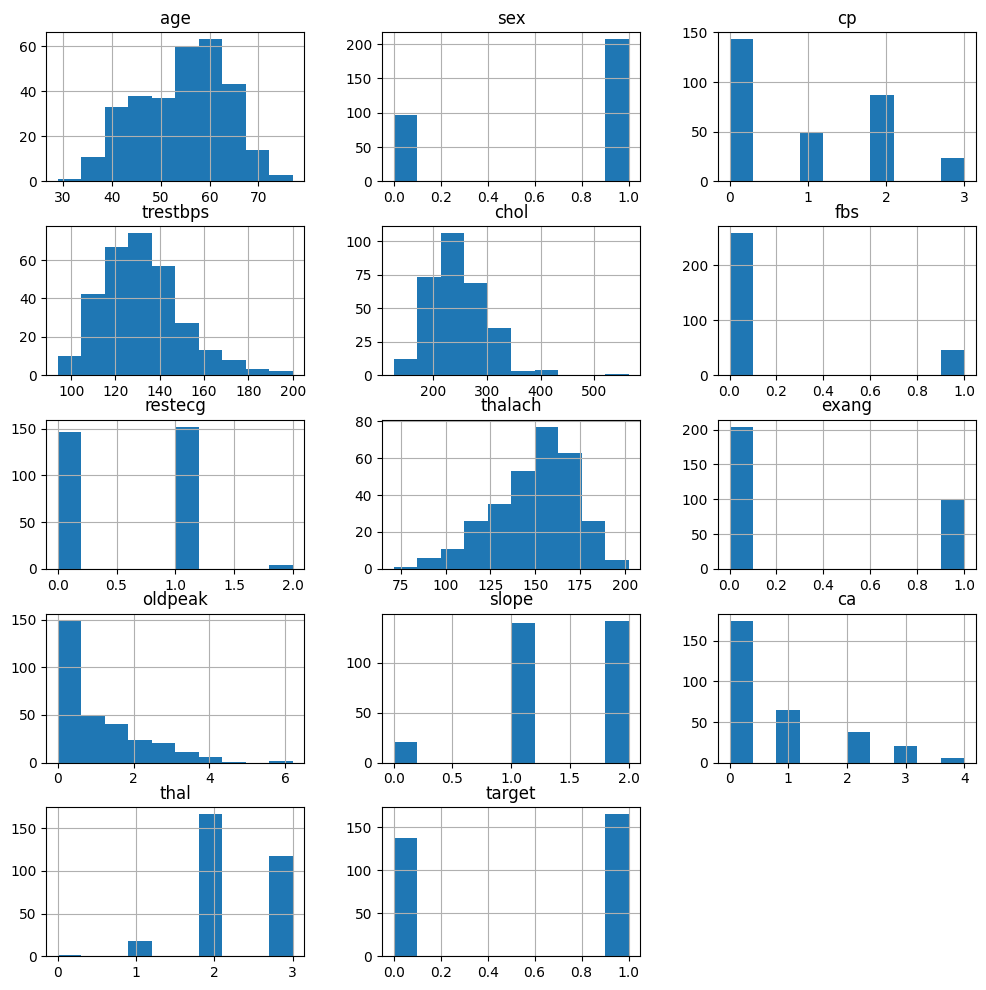

In [ ]:
df.hist(figsize=(12,12), layout=(5,3));

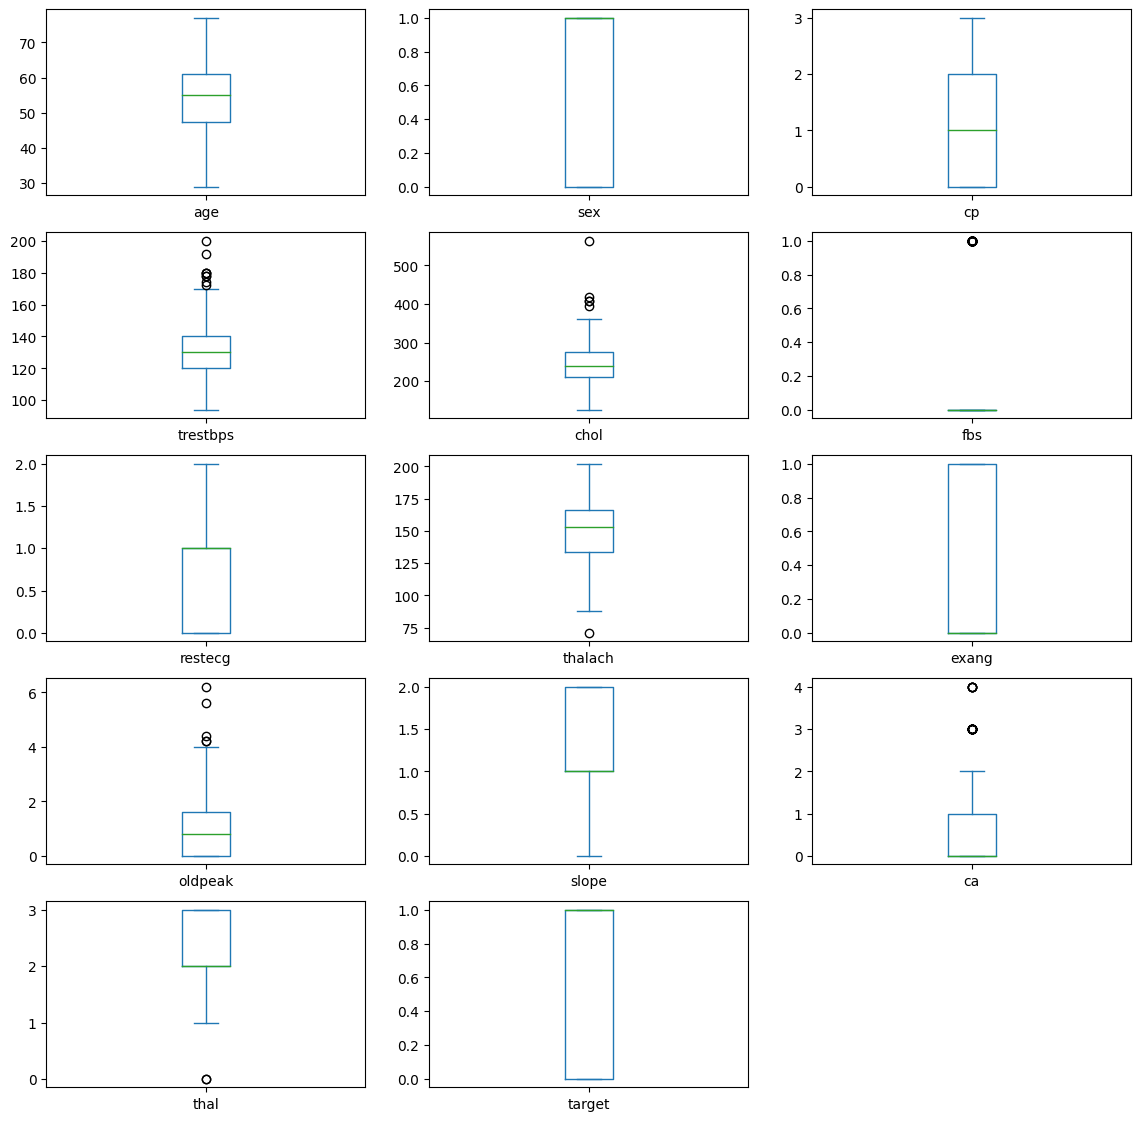

In [ ]:
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(14,14))
plt.show()

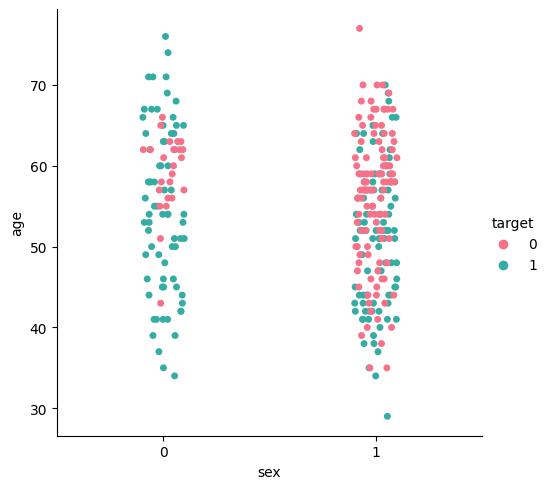

In [ ]:
sns.catplot(data=df,x='sex',y='age',hue='target',palette='husl')

<Axes: xlabel='sex', ylabel='chol'>

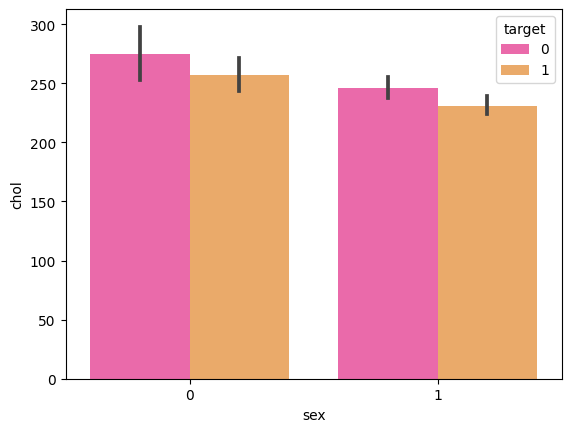

In [ ]:
sns.barplot(data=df,x='sex',y='chol',hue='target',palette='spring')

In [ ]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

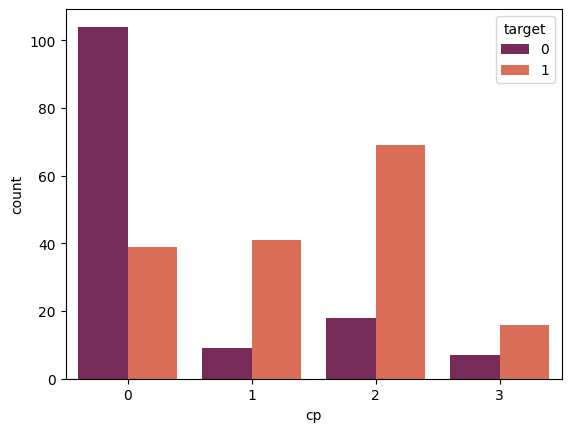

In [ ]:
sns.countplot(x='cp',hue='target',data=df,palette='rocket')

In [ ]:
gen=pd.crosstab(df['sex'],df['target'])
print(gen)

target    0   1
sex            
0        24  72
1       114  93


<Axes: xlabel='sex'>

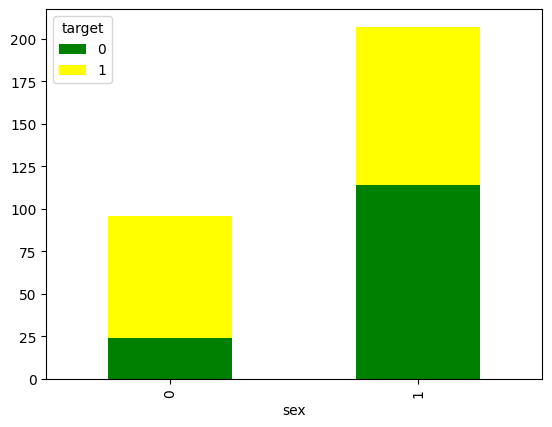

In [ ]:
gen.plot(kind='bar',stacked=True,color=['green','yellow'],grid=False)

<Axes: xlabel='sex'>

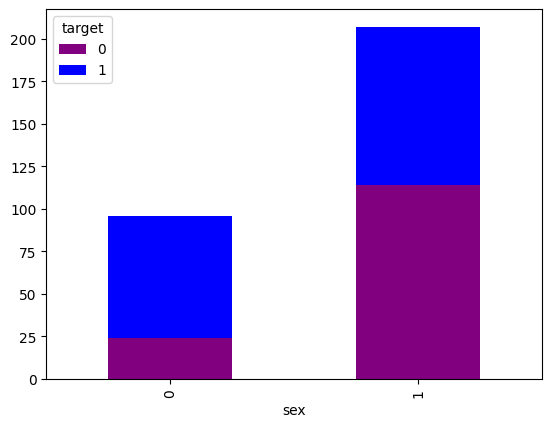

In [ ]:
gen.plot(kind='bar', stacked=True, color=['purple','blue'], grid=False)

<Axes: xlabel='cp'>

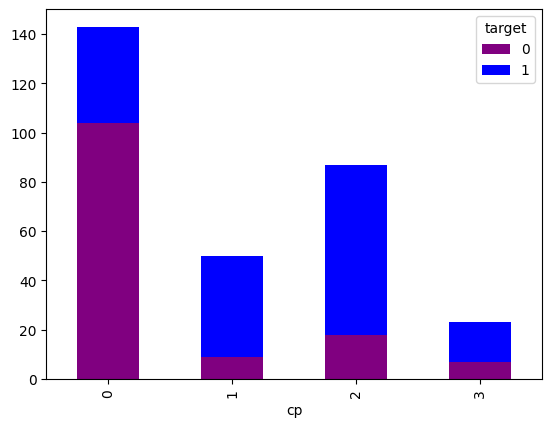

In [ ]:
chest_pain=pd.crosstab(df['cp'],df['target'])
chest_pain
chest_pain.plot(kind='bar', stacked=True, color=['purple','blue'], grid=False)

In [ ]:
chest_pain=pd.crosstab(df['cp'],df['target'])
chest_pain

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler=StandardScaler()
columns_to_scale=['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale]=StandardScaler.fit_transform(df[columns_to_scale])

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,0.290464,0,0,0.478391,-0.101730,0,1,-1.165281,1,-0.724323,1,0,3,0
299,-1.033002,1,3,-1.234996,0.342756,0,1,-0.771706,0,0.138373,1,0,3,0
300,1.503641,1,0,0.706843,-1.029353,1,1,-0.378132,0,2.036303,1,2,3,0
301,0.290464,1,0,-0.092738,-2.227533,0,1,-1.515125,1,0.138373,1,1,3,0
302,0.290464,0,1,-0.092738,-0.198357,0,0,1.064975,0,-0.896862,1,1,2,0


In [ ]:
x=df.drop(['target'],axis=1)
y=df['target']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [ ]:
print('x_train',x_train.size)
print('x_train',x_test.size)
print('y_train',y_train.size)
print('x_test',y_test.size)

x_train 2756
x_train 1183
y_train 212
x_test 91


In [ ]:
from  sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model1=lr.fit(x_train,y_train)
prediction1=model1.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm

array([[36,  4],
       [ 3, 48]])

<Axes: >

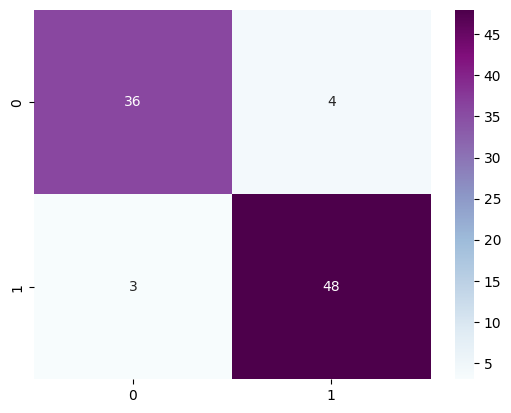

In [ ]:
sns.heatmap(cm,annot=True,cmap='BuPu')

In [ ]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy: 0.9230769230769231


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.9230769230769231

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.92      0.94      0.93        51

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



In [ ]:
print('KNN :',accuracy_score(y_test,prediction1))
print('lr:',accuracy_score(y_test,prediction1))
print('dtc :',accuracy_score(y_test,prediction1))
print('rfc :',accuracy_score(y_test,prediction1))
print('NB :',accuracy_score(y_test,prediction1))
print('SVC :',accuracy_score(y_test,prediction1))

KNN : 0.9230769230769231
lr: 0.9230769230769231
dtc : 0.9230769230769231
rfc : 0.9230769230769231
NB : 0.9230769230769231
SVC : 0.9230769230769231
